## LightGBM

GBDT(Gradient Boosting Decision Tree) 是利用弱分類器迭代訓練來得到最佳的模型，而 LightGBM(Light Gradient Boosting Machine)是實現 GBDT 的演算法。
由於 XGBoost 在訓練的時候空間暫存大，而 LightGBM 優化了 XGBoost 訓練的缺陷，在同樣的條件下加速 GBDT 演算法的運算。

LightGBM 修補了 GBDT 在巨量資料下會遇到記憶體限制、速度上的限制，更適合於實際面的應用。


Leaf-wise的優點是在分裂次數相同的情況下，可以降低更多的誤差以達到更好的準確度；但是葉子可能因此一直長下去導致過度擬合，這裡可以增加 max_depth 的數量限制防止過擬合。

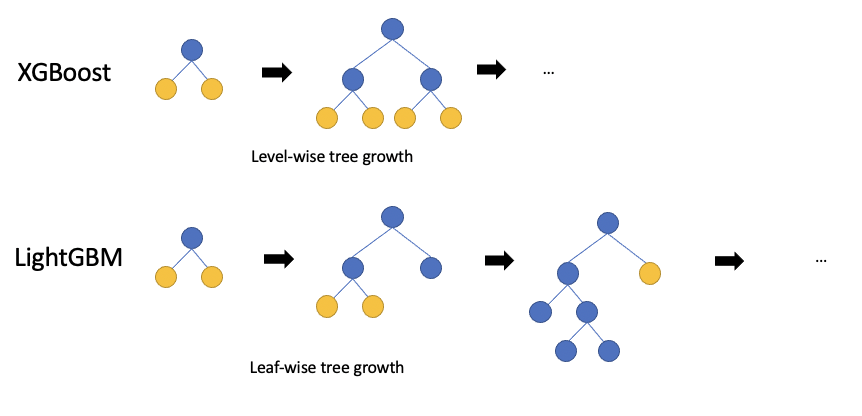

### LightGBM 特色
[參考來源](https://www.gushiciku.cn/pl/pvRC/zh-tw)

- 速度更快
  - 採用直方圖演算法將遍歷樣本轉變為遍歷直方圖，極大的降低了時間複雜度。
  - 訓練過程中採用單邊梯度演算法過濾掉梯度小的樣本，減少了大量的計算。
  - 採用了基於 Leaf-wise 演算法的增長策略構建樹，減少了很多不必要的計算量。
  - 採用優化後的特徵並行、資料並行方法加速計算，當資料量非常大的時候還可以採用投票並行的策略。
  - 對快取也進行了優化，增加了快取命中率。
- 記憶體消耗更小
  - 採用直方圖演算法將儲存特徵值轉變為儲存 bin 值，降低了記憶體消耗。
  - 訓練過程中採用互斥特徵捆綁演算法減少了特徵數量，降低了記憶體消耗。

### 安裝方式
```
pip install lightgbm
```

### 實際示範

In [23]:
# LightGBM

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Book_Purchased.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 5].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

import lightgbm as lgb
from lightgbm import LGBMClassifier

# 建立LightGBM模型
classifier = lgb.LGBMClassifier(objective = 'binary', 
                                learning_rate = 0.05, 
                                n_estimators = 100, 
                                random_state=0)
# 使用訓練資料訓練模型
classifier.fit(X_train, y_train)
# 使用訓練資料預測分類
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[59  8]
 [ 4 29]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        67
           1       0.78      0.88      0.83        33

    accuracy                           0.88       100
   macro avg       0.86      0.88      0.87       100
weighted avg       0.89      0.88      0.88       100



### 看圖說故事

Accuracy:0.880
Classification report
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        67
           1       0.78      0.88      0.83        33

    accuracy                           0.88       100
   macro avg       0.86      0.88      0.87       100
weighted avg       0.89      0.88      0.88       100

Confusion matrix
[[59  8]
 [ 4 29]]
ROC AUC Score
0.9007236544549977
Feature importances: [549, 572]
Plot feature importances...


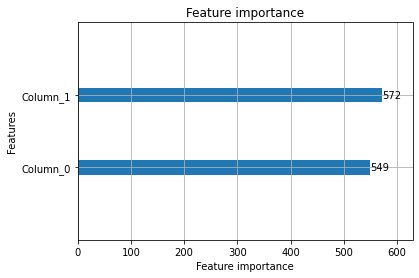

In [19]:
LGBM_grid_measure = measure_performance(X = X_test, y = y_test, clf = classifier, show_classification_report=True, show_confusion_matrix=True)

# feature importances
print('Feature importances:', list(classifier.feature_importances_))

# visualization
print('Plot feature importances...')
ax = lgb.plot_importance(classifier, max_num_features=len(train))
plt.show()

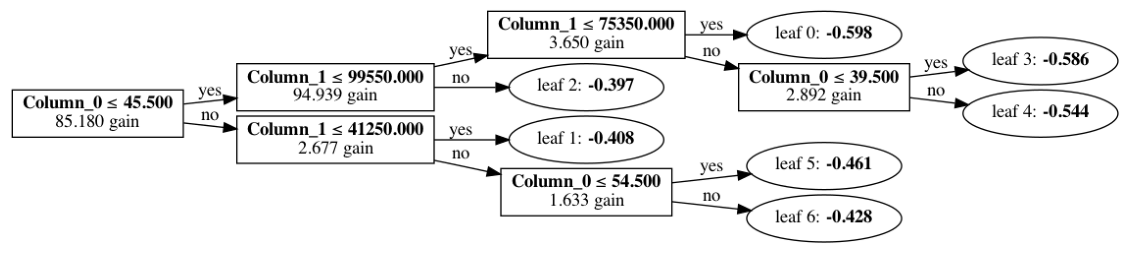

In [27]:
ax = lgb.plot_tree(classifier, figsize=(20, 8), show_info=['split_gain'])
plt.show()

### 比較目前所學的演算法

[22:06:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


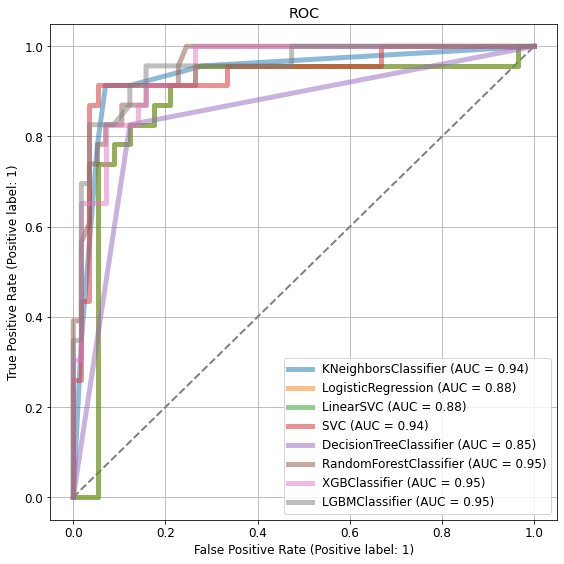

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('Book_Purchased.csv')
dataset['Purchased'] = dataset['Purchased'].astype('str')
dx = dataset.iloc[:, [2, 3, 4]].values
dy = dataset.iloc[:, 5].values
dx = PCA(n_components=2).fit_transform(dx)
dx = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size=0.2, random_state=0)

# 建立不同模型
models = [
    KNeighborsClassifier(),
    LogisticRegression(),
    LinearSVC(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    ]
# 訓練不同模型
for i, _ in enumerate(models):
    models[i].fit(dx_train, dy_train)
plt.rcParams['font.size'] = 12
plt.figure(figsize=(8, 8))
# 建立子圖表
ax = plt.subplot(111)
ax.set_title('ROC')
# 畫對角線
ax.plot([0, 1], [0, 1], color='grey',
        linewidth=2, linestyle='--')
# 對每個模型畫 ROC 曲線
for model in models:
    plot_roc_curve(model, dx_test, dy_test,
                   linewidth=5, alpha=0.5, ax=ax)
plt.grid(True)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.tight_layout()
plt.show()